In [2]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.preprocessing import LabelEncoder

# 1. Read Data and Preprocess

In [3]:
data = pd.read_csv('marketing_campaign.csv', sep = '\t')

In [4]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [7]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [8]:
data.shape

(2240, 29)

There are 24 missing values in the "Income" column, and given the limited amount of data entries, I propose replacing these null values with the median instead of deleting the corresponding rows. This approach will prevent us from losing any valuable information.

In [9]:
# Replace null values in "Income" column with median
median_income = data['Income'].median()
data['Income'].fillna(median_income, inplace=True)
# Check if there is any null value left
data['Income'].isnull().sum()

0

We also need to encode categorical columns.

In [10]:
data['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

Marital status and education both have multiple categories that are synonymous. For instance, the terms "Divorced", "Widow", "Alone", "Absurd", and "Yolo" can all be classified as "Single", while "Together" and "Married" can be grouped as "Relationship". 

In [11]:
# Replace "Divorced", "Widow", "Alone", "Absurd", "Yolo" with "Single"
data['Marital_Status'] = data['Marital_Status'].replace(['Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO'], 'Single')
# Replace "Together" and "Married" with "Relationship"
data['Marital_Status'] = data['Marital_Status'].replace(['Together','Married'], 'Relationship')


In [12]:
data['Marital_Status'].unique()

array(['Single', 'Relationship'], dtype=object)

In [13]:
data['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

Similarly, the designations "2nd Cycle", "Master", and "PhD" can be classified as "Postgraduate", while "Basic" can be categorized as "Undergraduate".

In [14]:
# Replace "Basic" with "Undergraduate"
data['Education'] = data['Education'].replace(['Basic'], 'Undergraduate')
# Replace "2nd Cycle", "Master" and "PhD" with "Postgraduate"
data['Education'] = data['Education'].replace(['2n Cycle', 'Master', 'Graduation','PhD'], 'Postgraduate')

In [15]:
data['Education'].unique()

array(['Postgraduate', 'Undergraduate'], dtype=object)

In [16]:
# Convert categorical variables to numerical variables
label_encoder = LabelEncoder()

# Education
label_encoder.fit(data['Education'])
print(list(label_encoder.classes_))
data['Education'] = label_encoder.transform(data['Education'])
print("Education labels: \n", "\t0: %s\n \t1: %s\n" % tuple(label_encoder.inverse_transform([0, 1])))

# Marital_Status
label_encoder.fit(data['Marital_Status'])
print(list(label_encoder.classes_))
data['Marital_Status'] = label_encoder.transform(data['Marital_Status'])
print("Maritial status labels: \n", "\t0: %s\n \t1: %s" % tuple(label_encoder.inverse_transform([0, 1])))

['Postgraduate', 'Undergraduate']
Education labels: 
 	0: Postgraduate
 	1: Undergraduate

['Relationship', 'Single']
Maritial status labels: 
 	0: Relationship
 	1: Single


In [17]:
# Convert "Dt_Customer"" to datetime
data["Dt_Customer"] = pd.to_datetime(data["Dt_Customer"], format="%d-%m-%Y")
# Rename "Dt_Customer" as "Date"
data.rename(columns={"Dt_Customer": "Date"}, inplace=True)


We can merge the columns KidHome and TeenHome into a new feature called 'Kid'.

In [18]:
# Merge Kidhome and Teenhome as Kid
data['Kid'] = data['Kidhome'] + data['Teenhome']
# Drop Kidhome and Teenhome
data.drop(['Kidhome', 'Teenhome'], axis=1, inplace=True)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   int64         
 3   Marital_Status       2240 non-null   int64         
 4   Income               2240 non-null   float64       
 5   Date                 2240 non-null   datetime64[ns]
 6   Recency              2240 non-null   int64         
 7   MntWines             2240 non-null   int64         
 8   MntFruits            2240 non-null   int64         
 9   MntMeatProducts      2240 non-null   int64         
 10  MntFishProducts      2240 non-null   int64         
 11  MntSweetProducts     2240 non-null   int64         
 12  MntGoldProds         2240 non-null   int64         
 13  NumDealsPurchases    2240 non-nul

In [20]:
# We don't need Z_CostContact and Z_Revenue columns
data.drop(["Z_CostContact", "Z_Revenue"], axis=1, inplace=True)

# 2. Data Analysis

In [21]:
# Some default configs
matplotlib.rcParams['figure.figsize'] = (10, 10)
sns.set(rc={'figure.figsize':(10,10)})
sns.set_theme(style="whitegrid")

<AxesSubplot:xlabel='Age', ylabel='Count'>

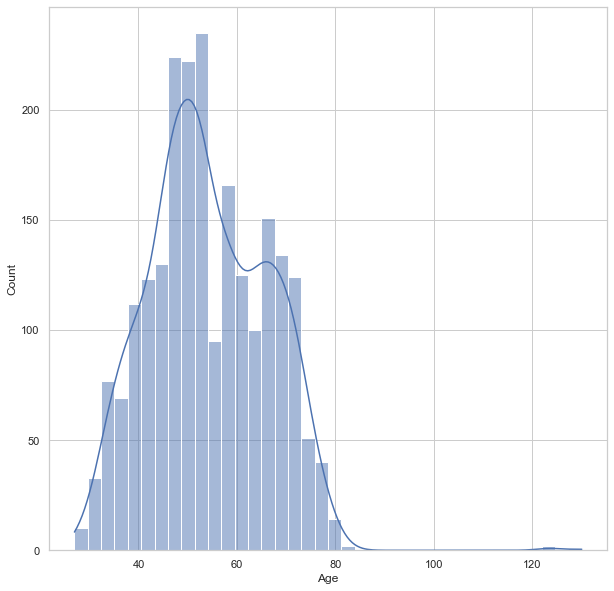

In [22]:
# Let's start our data analysis by looking at the distribution of Age

# Calculate age from birth year
current_year = datetime.datetime.now().year
data["Age"] = current_year - data["Year_Birth"]

# Plot the distribution of Age
sns.histplot(data["Age"], kde=True)

<AxesSubplot:xlabel='Income', ylabel='Count'>

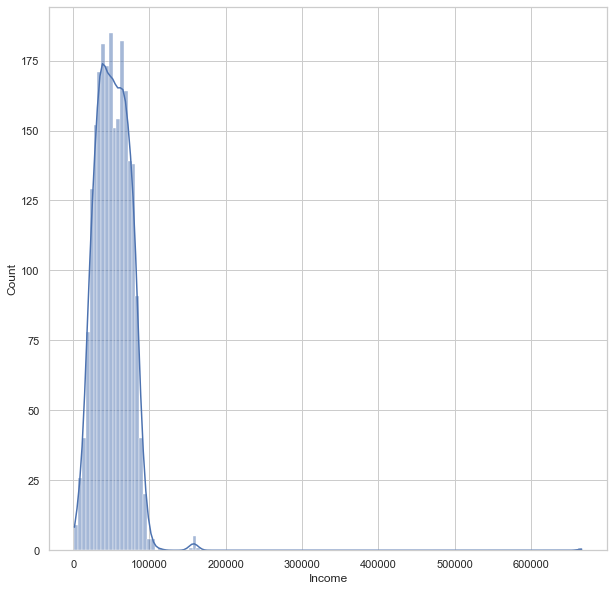

In [23]:
# Let's look at the distribution of Income
sns.histplot(data["Income"], kde=True)

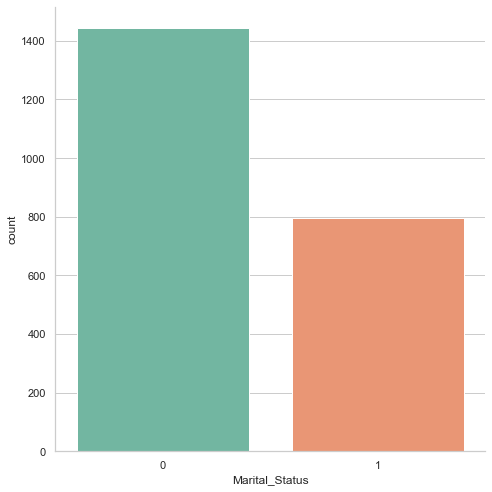

In [24]:
# Marital status counts
sns.catplot(x="Marital_Status", kind="count",data=data, height=7, aspect=1, palette="Set2")

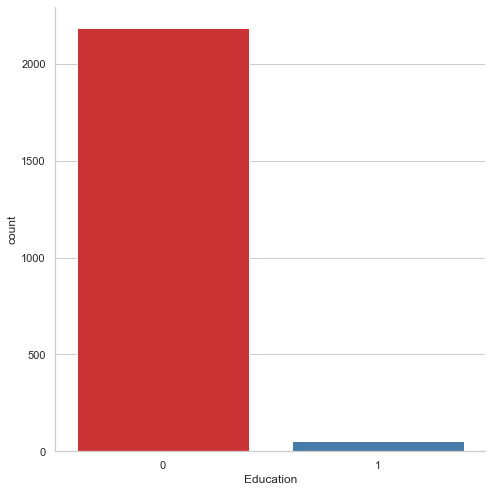

In [25]:
# Education counts
sns.catplot(x="Education", kind="count",data=data, height=7, aspect=1, palette="Set1")

<AxesSubplot:xlabel='Marital_Status', ylabel='Income'>

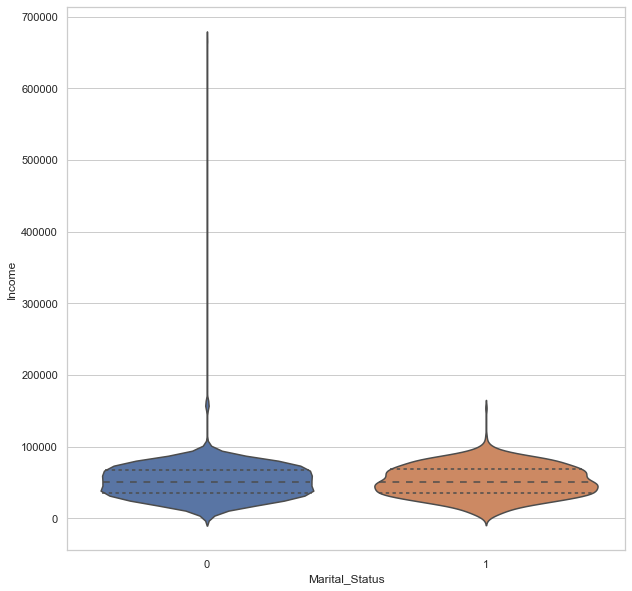

In [26]:
# Income distribution by Marital Status
sns.violinplot(x="Marital_Status", y="Income", data=data, inner="quartile")

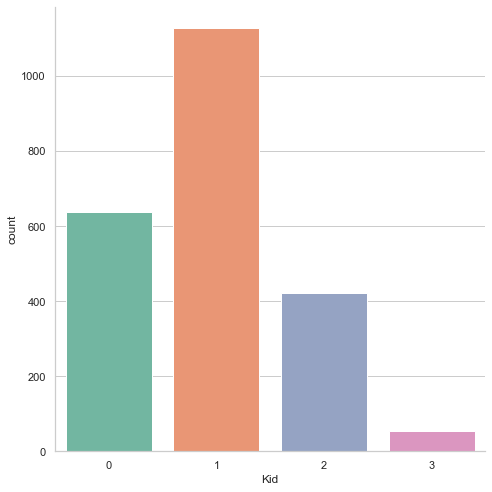

In [27]:
# Kidhome counts
sns.catplot(x="Kid", kind="count",data=data, height=7, aspect=1, palette="Set2")

In [28]:
# Let's see percentages
data['Kid'].value_counts(normalize=True) * 100

1    50.357143
0    28.482143
2    18.794643
3     2.366071
Name: Kid, dtype: float64

- The age range of our dataset's customers spans from 27 to 130 years old, with an average age of 54.
- Our dataset includes individuals with incomes ranging from $1.7K to $666K , with an average income of $52K.
- When comparing the income statistics of single individuals and those in relationships within our dataset, we observe that the distributions are quite similar, with quartiles and mean values being close. However, those in relationships have some significant outliers.
- Our dataset comprises over 1400 individuals in relationships and approximately 800 single individuals.
- Nearly all customers in our dataset have completed postgraduate education, with only a small minority having completed undergraduate studies.
- The minimum number of children that customers have in our dataset is 0, while the maximum is 3, and the mean is 1. Additionally, individuals with one child make up 50.35% of the dataset, those with no children make up 28.48%, those with two children comprise 18.79%, and those with three children make up 2.36%.

0    99.0625
1     0.9375
Name: Complain, dtype: float64

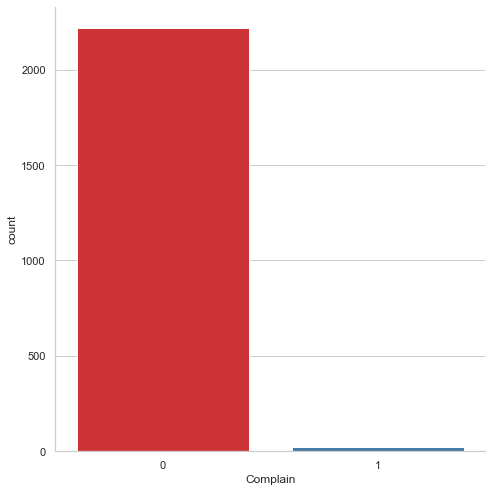

In [29]:
# Let's continue with analyzing complains
sns.catplot(x="Complain", kind="count",data=data, height=7, aspect=1, palette="Set1")
# Percentage of complains
data['Complain'].value_counts(normalize=True) * 100

Approximately 1% of the customers have filed complaints thus far, which is a positive development! However, there is still room for improvement in reducing the number of complaints. Let's examine which category the customers who filed complaints spend the most time in.

MntWines            44.895636
MntFruits            6.426312
MntMeatProducts     29.879823
MntFishProducts      6.843770
MntSweetProducts     4.655281
MntGoldProds         7.299178
dtype: float64


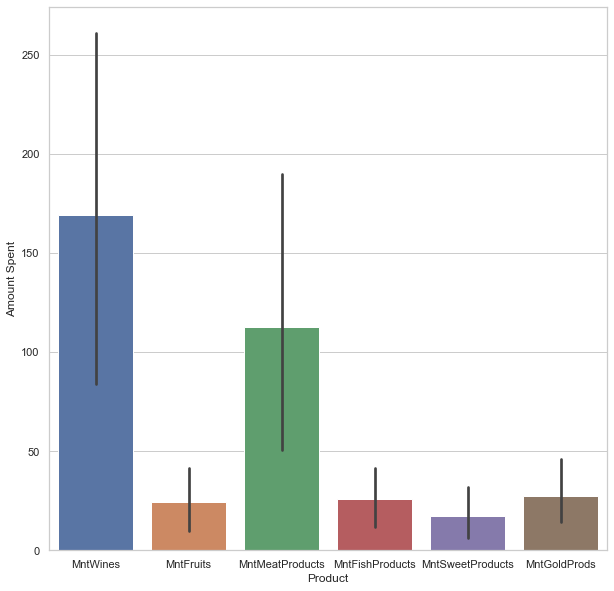

In [30]:
# Create a subset DataFrame with only the columns of interest
subset_df = data[['Complain', 'Age', 'Marital_Status', 'Kid','MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]

# Filter the subset DataFrame to only include customers who have filed complaints
complained_df = subset_df[subset_df['Complain'] == 1]

# Reshape
melted_df = complained_df.melt(id_vars=['Complain'], var_name='Product', value_name='Amount Spent', value_vars=['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds'])
sns.barplot(x='Product', y='Amount Spent', data=melted_df)

# Calculate the percentage of time spent on each product by customers who have filed complaints
total_time_spent = complained_df.drop(['Age', 'Marital_Status', 'Kid'], axis=1).sum()[1:]
percentages = (total_time_spent / total_time_spent.sum()) * 100
print(percentages)


Based on the findings, 44.89% of the individuals who lodged a complaint primarily spent their money on wines, while 29.87% focused on meats, and approximately 6.5% allocated their money to fruits, fish, sweets, and luxury items. Consequently, it can be inferred that if the company targets the grievances related to the wine and meat departments, the complaints could decrease by approximately 75%.

We can determine the distribution of customer ages who have filed complaints.

<AxesSubplot:xlabel='Age', ylabel='Count'>

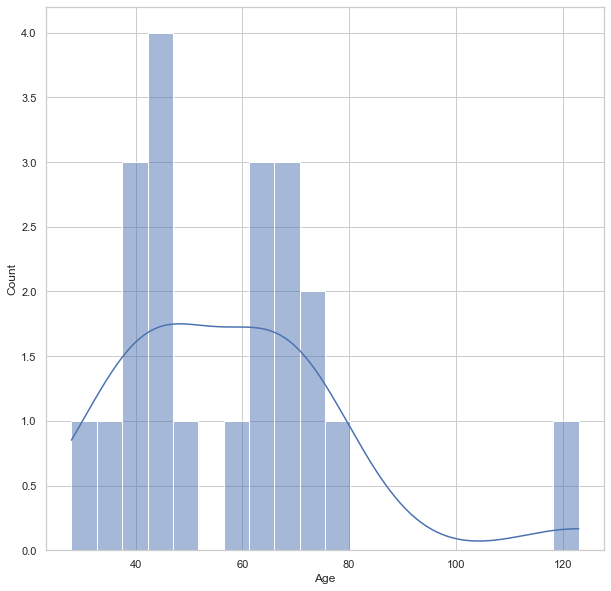

In [31]:
# Age distribution of the customers who have complaint
sns.histplot(complained_df["Age"], kde=True, bins=20)

The majority of the customers who filed complaints are in the age range of 40-70. The company should prioritize its focus on customers within this age range.

Let's find out the marital status of the customers who have complaint.

0    61.904762
1    38.095238
Name: Marital_Status, dtype: float64

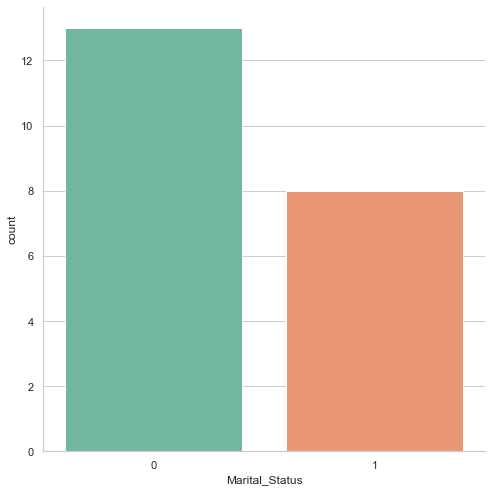

In [32]:
sns.catplot(x="Marital_Status", kind="count",data=complained_df, height=7, aspect=1, palette="Set2")

#Percentages of marital status of the customers who have complaint
complaint_counts = complained_df['Marital_Status'].value_counts()
total_complaints = len(complained_df)
marital_status_percentages = (complaint_counts / total_complaints) * 100
marital_status_percentages


According to our analysis, 61.9% of the customers who have filed complaints are in a relationship, while 38.09% are single. The company could potentially focus on targeting customers who are in a relationship based on these findings.

I am curious about whether the customers who filed a complaint have children, and if so, how many children they have. 

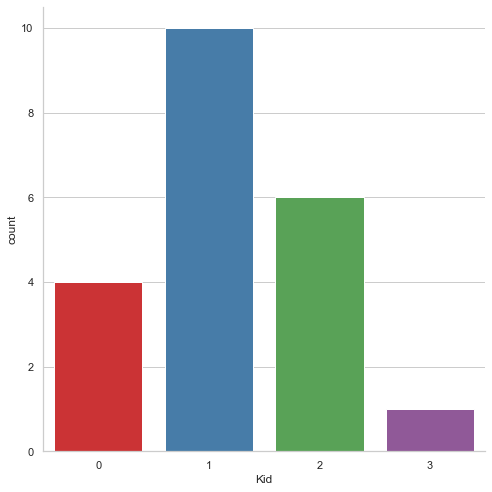

In [33]:
sns.catplot(x="Kid", kind="count",data=complained_df, height=7, aspect=1, palette="Set1")

 It appears that approximately 20% of the complaining customers do not have any children, while the remaining 80% have at least one child. The company may want to investigate any issues related to products for children to identify potential reasons why customers are filing complaints.